In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Separate attribute & label

In [0]:
import numpy as np

x = data['YearsExperience']
y = data['Salary']
x = x[:,np.newaxis]

Create SVR model

In [4]:
from sklearn.svm import SVR

model = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(x, y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Plot

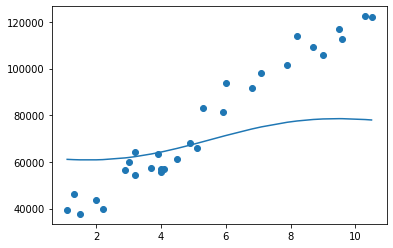

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x, model.predict(x))

Because the model of SVR is not good enough, let's do a grid search to find optimum model

In [6]:
from sklearn.model_selection import GridSearchCV

model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model, parameters)
grid_search.fit(x,y)
grid_search.best_params_

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}

Create new SVR model using the result of grid search

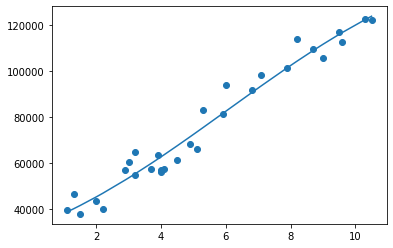

In [7]:
new_model = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(x, y)

# visualize the prediction result
plt.scatter(x,y)
plt.plot(x, new_model.predict(x))